In [1]:
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

In [1]:
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [51]:
import sys
import matplotlib as mpl
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)

python 2.7.12 |Anaconda 2.5.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

pandas 0.18.1
numpy 1.10.4


In [2]:
df = sm.datasets.fair.load_pandas().data

In [3]:
df.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273


##### data exploration

In [4]:
# some summary statistics.

In [5]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


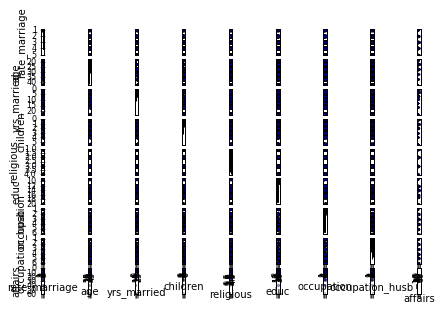

In [6]:
#need to run this to see the figures. 
#%matplotlib inline

import matplotlib.pyplot as plt

axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.savefig('scatter_matrix.png')
#plt.show()

In [7]:
df['affair_bool'] = (df.affairs > 0).astype(int)

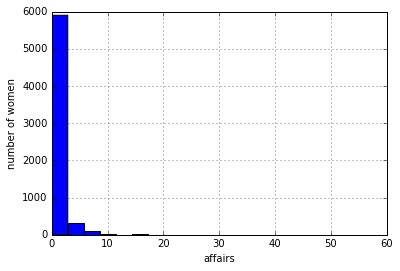

In [8]:
df['affairs'].hist(bins=20)
xlabel('affairs')
ylabel('number of women')

In [9]:
#Exploring affairs vs marraige ratings : 

In [10]:
rating_vs_target = pd.crosstab(df['rate_marriage'], df['affair_bool'])
rating_vs_target

affair_bool,0,1
rate_marriage,,
1.0,25,74
2.0,127,221
3.0,446,547
4.0,1518,724
5.0,2197,487


In [11]:
total_ratings = rating_vs_target.apply(sum)
total_ratings

affair_bool
0    4313
1    2053
dtype: int64

In [12]:
rating_vs_target /= total_ratings
rating_vs_target

affair_bool,0,1
rate_marriage,,
1.0,0.005796,0.036045
2.0,0.029446,0.107647
3.0,0.103408,0.266439
4.0,0.351959,0.352655
5.0,0.509390,0.237214


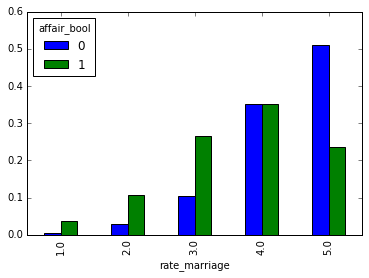

In [14]:
rating_vs_target.plot(kind='bar')

##### Conclusion - Women who rate their marriages higher have lesser number of affairs. 

In [15]:
#splitting the model into train and test sets

In [16]:
from sklearn.cross_validation import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
train_y = x_train["affair_bool"]

In [18]:
test_y = x_test["affair_bool"]

In [19]:
x_train = x_train.drop("affairs", axis = 1, inplace = False)
x_train = x_train.drop("affair_bool", axis = 1, inplace = False)

In [20]:
x_test = x_test.drop("affairs", axis = 1, inplace = False)
x_test = x_test.drop("affair_bool", axis = 1, inplace = False)

In [21]:
#fitting the model

In [22]:
logit = linear_model.LogisticRegression()
logit.fit(x_train,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
#making predictions. By default, 0.5 is chosen as the threshold

In [24]:
predicted = logit.predict(x_test)

In [25]:
#calculating accuracy

In [26]:
np.mean((predicted - test_y)**2)

0.28100470957613816

In [27]:
#coefficients

In [28]:
logit.coef_

array([[-0.68386705, -0.04990899,  0.10236987, -0.01012432, -0.35709835,
        -0.02578675,  0.1606459 ,  0.01511249]])

In [29]:
logit.intercept_

array([ 3.12439693])

In [30]:
weights = pd.Series(logit.coef_[0],
                 index= x_train.columns.values)
weights.sort_values()

rate_marriage     -0.683867
religious         -0.357098
age               -0.049909
educ              -0.025787
children          -0.010124
occupation_husb    0.015112
yrs_married        0.102370
occupation         0.160646
dtype: float64

##### Conclusions - We observed from the bar graph that a higher marriage rating means a lower chance of having an affair. The negative coefficient value of rate_marriage variable - -0.683867 tells us exactly that. 

In [31]:
# We observe that the occupation husb and occupation columns are categorical columns. We need to make them categorical so we will use design matrices.
# The C(occupation_husb) and C(occupation) is doing just that

In [32]:
y, X = dmatrices('affair_bool ~ rate_marriage + age + educ + children + C(occupation_husb) + C(occupation) + yrs_married', df, return_type = 'dataframe')

In [33]:
logit_categorical = linear_model.LogisticRegression(fit_intercept = False, C = 1e9)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
logit_categorical.fit(X_train,y_train)

/home/akshata/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
logit_categorical.coef_

array([[  1.93336242e+00,   6.01480074e-02,   1.71618953e-01,
          4.12500848e-02,   1.17405251e-02,  -1.66178660e-04,
          8.06450629e-01,   1.07840612e+00,   8.16342755e-01,
          1.44762838e+00,   1.61121363e+00,  -7.31529603e-01,
         -6.04893098e-02,   3.26316601e-03,  -3.87700602e-02,
          1.06596498e-01]])

In [37]:
weights_categories = pd.Series(logit_categorical.coef_[0],
                 index= X.columns.values)
weights_categories.sort_values()

rate_marriage               -0.731530
age                         -0.060489
children                    -0.038770
C(occupation_husb)[T.6.0]   -0.000166
educ                         0.003263
C(occupation_husb)[T.5.0]    0.011741
C(occupation_husb)[T.4.0]    0.041250
C(occupation_husb)[T.2.0]    0.060148
yrs_married                  0.106596
C(occupation_husb)[T.3.0]    0.171619
C(occupation)[T.2.0]         0.806451
C(occupation)[T.4.0]         0.816343
C(occupation)[T.3.0]         1.078406
C(occupation)[T.5.0]         1.447628
C(occupation)[T.6.0]         1.611214
Intercept                    1.933362
dtype: float64

In [38]:
# This makes more sense. Let's calculate the accuracy insample 

In [39]:
logit_categorical.score(X_train, y_train)

0.71970377019748655

In [40]:
# Let's now check the out of sample test accuracy 

In [41]:
predicted_logit_categorical = logit_categorical.predict(X_test)

In [42]:
metrics.accuracy_score(y_test, predicted_logit_categorical)

0.73403141361256541

In [43]:
#getting the predicted probabilities.
predicted_prob = logit_categorical.predict_proba(X_test)

In [44]:
predicted_class_1 = [item[1] for item in predicted_prob]


In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_class_1)
roc_auc = metrics.auc(fpr,tpr)

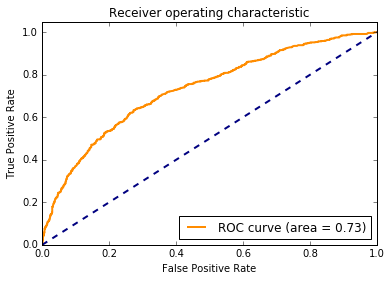

In [46]:
#adapted from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc.png')
plt.show()
